In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd
from faker import Faker
from matplotlib.widgets import Slider

In [2]:
# Initilize Faker

fake = Faker()

data = {
    'Name': [fake.name() for _ in range(50)], # 50 random names for Employees
    'Age': [fake.random_int(min=22,max=65) for _ in range(50)], # Random ages between 22 and 65
    'Job_Role': [fake.job() for _ in range(50)], # Random job roles
    'Region': [fake.random_element(elements=('North','South','East','West')) for _ in range(50)], # Random regions 50
    'Sales': [fake.random_int(min=100,max=1000) for _ in range(50)], # Random sales between 1000 and 10000
    'Date': [fake.date_between(start_date='-1y', end_date='today') for _ in range(50)], # Random dates between today and a year ago
}

df = pd.DataFrame(data)

df = df.sort_values(by='Date')
df

,Name,Age,Job_Role,Region,Sales,Date
23,Aimee Watson,37,Cytogeneticist,East,476,2024-01-10
4,Richard Holmes,28,Biomedical scientist,West,675,2024-01-16
14,Tina Hill,51,Proofreader,West,765,2024-01-26
42,Andrew Potter,23,"Embryologist, clinical",South,563,2024-01-31
15,Sandra Robinson,49,Lobbyist,South,359,2024-02-01
46,Jeffrey Elliott,41,Medical laboratory scientific officer,West,894,2024-02-08
29,Christopher Scott,27,Special educational needs teacher,South,825,2024-02-12
18,Dr. Linda Medina DVM,47,Early years teacher,West,610,2024-03-01
5,Teresa Huang,63,Research scientist (maths),North,892,2024-03-06
16,Kristen Shepard,37,"Surveyor, building",East,950,2024-03-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 23 to 40
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      50 non-null     object
 1   Age       50 non-null     int64 
 2   Job_Role  50 non-null     object
 3   Region    50 non-null     object
 4   Sales     50 non-null     int64 
 5   Date      50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.7+ KB


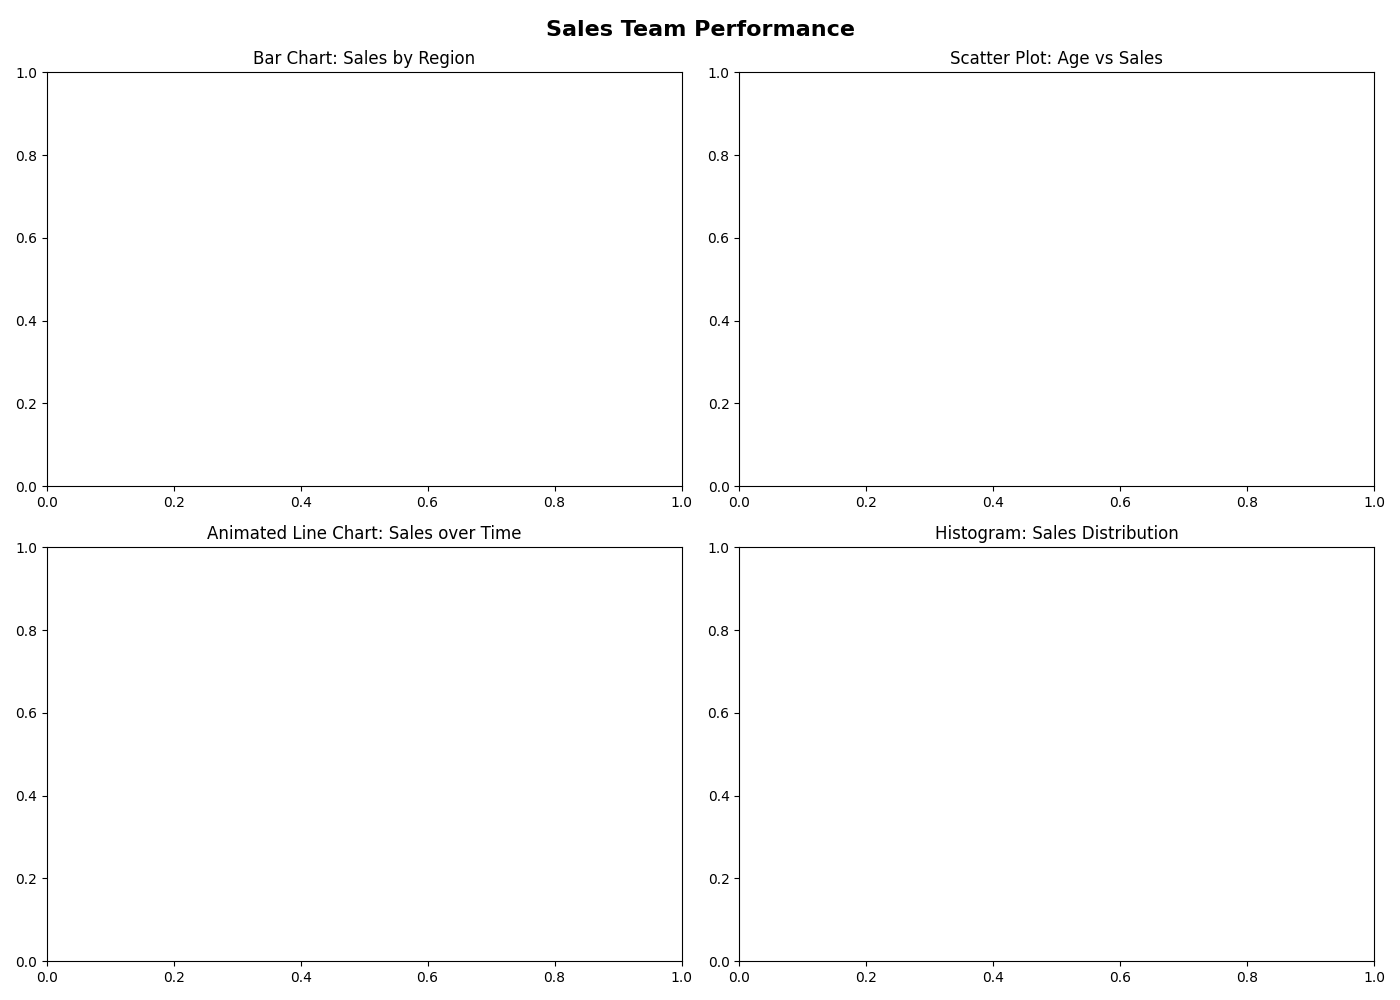

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Sales Team Performance', fontsize=16, fontweight='bold')

axs[0, 0].set_title('Bar Chart: Sales by Region', fontsize=12)
axs[0, 1].set_title('Scatter Plot: Age vs Sales', fontsize=12)
axs[1, 0].set_title('Animated Line Chart: Sales over Time', fontsize=12)
axs[1, 1].set_title('Histogram: Sales Distribution', fontsize=12)

plt.tight_layout()

In [5]:
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region

Region
East     5724
North    7511
South    8352
West     7457
Name: Sales, dtype: int64

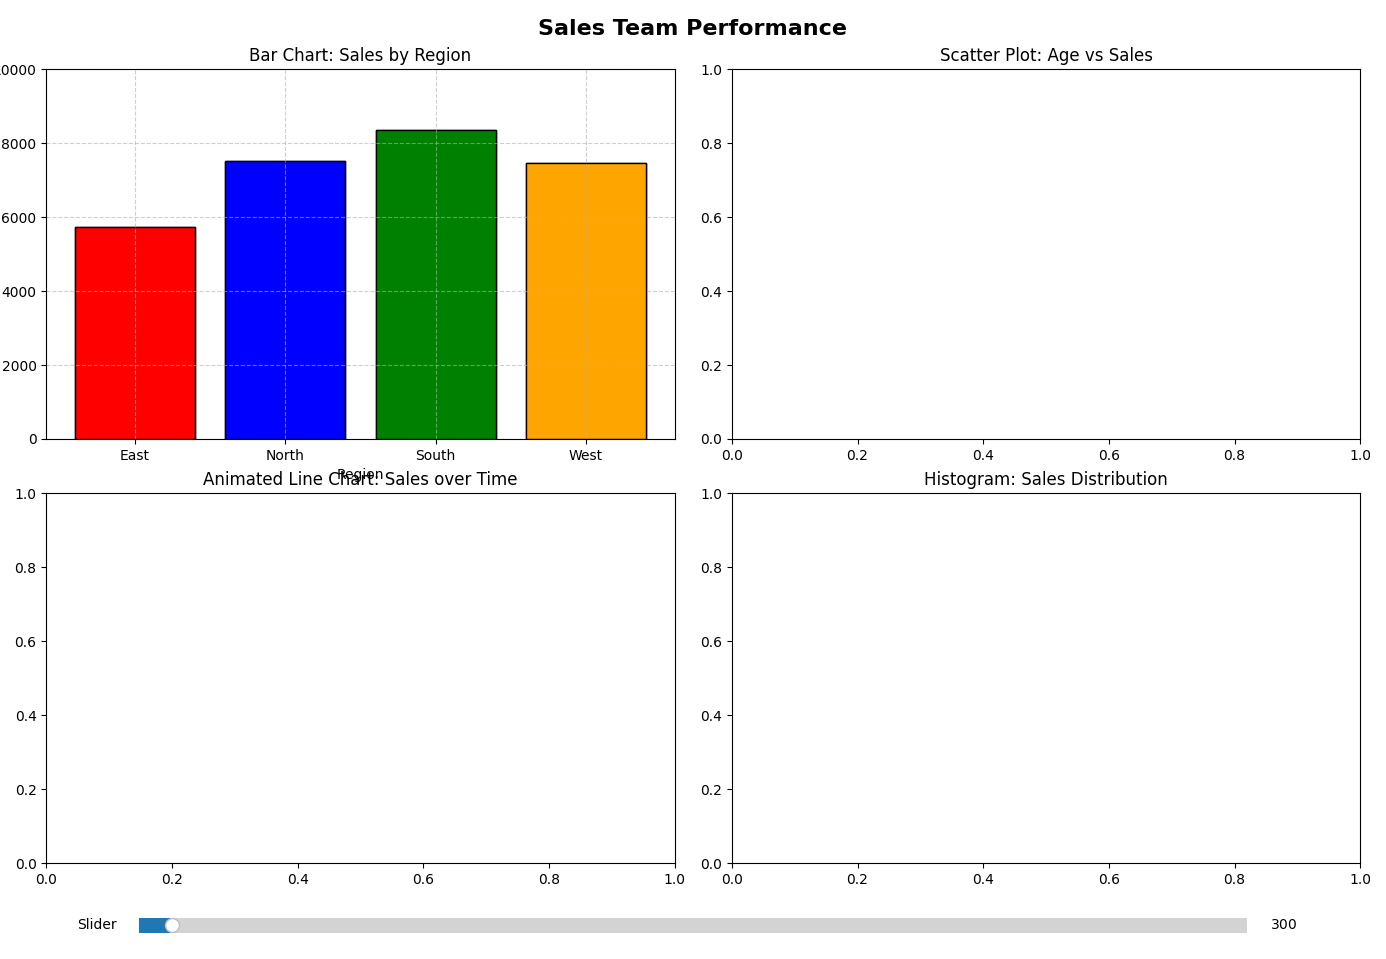

In [8]:
%matplotlib widget
axs[0,0].bar(sales_by_region.index, sales_by_region.values, color=['red', 'blue', 'green', 'orange'], edgecolor='black')
axs[0,0].set_xlabel('Region')
axs[0,0].set_ylabel('Sales')
axs[0,0].grid(True, linestyle='--', alpha=0.6)
axs[0,0].set_ylim(0, 10000)  # Set y-axis limits from 100 to 10000 to show a more zoomed out view

plt.subplots_adjust(bottom=0.1)
ax_slider = plt.axes([0.1, 0.02, 0.8, 0.03])

def update(val):
    threshold = slider.val
    filtered_df = df[df['Sales']>=threshold]
    sales_by_region = filtered_df.groupby('Region')['Sales'].sum()
    axs[0,0].clear()

    axs[0,0].bar(sales_by_region.index, sales_by_region.values, color='skyblue', edgecolor='black')
    axs[0,0].set_xlabel('Region')
    axs[0,0].set_ylabel('Total Sales $')

    fig.canvas.draw_idle()

slider = Slider(ax=ax_slider, label='Slider', valmin=0, valmax=10000, valinit=300, valstep=50)    
slider.on_changed(update)

plt.show()

In [7]:
threshold = slider.val
threshold

300